# TITANIC 

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
df = pd.read_csv("titanic.csv")

In [159]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [161]:
df.drop(["Name", "Cabin", "PassengerId", "Ticket", "SibSp", "Parch", "Embarked", "Fare"], inplace=True, axis=1)

In [162]:
df['Pclass'].unique()

array([3, 1, 2])

In [163]:
df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [164]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

In [165]:
# Apply one-hot encoding to 'Sex' and 'Pclass' columns, converting categorical values into binary columns
#This applies one-hot encoding to the categorical columns 'Sex' and 'Pclass'.One-hot encoding converts categorical variables into binary (0 or 1) indicator columns.
#For example: If 'Sex' has values ['male', 'female'], it will be transformed into two columns: 'Sex_female' and 'Sex_male', where each row has a 1 in the respective column. If 'Pclass' has values [1, 2, 3], it will be transformed into three columns: 'Pclass_1', 'Pclass_2', and 'Pclass_3'. The original 'Sex' and 'Pclass' columns are removed, and the new binary columns replace them.

df = pd.get_dummies(df, columns=['Sex', 'Pclass'])

In [166]:
# Remove rows with missing values to ensure clean data
df.dropna(inplace=True)

<Axes: >

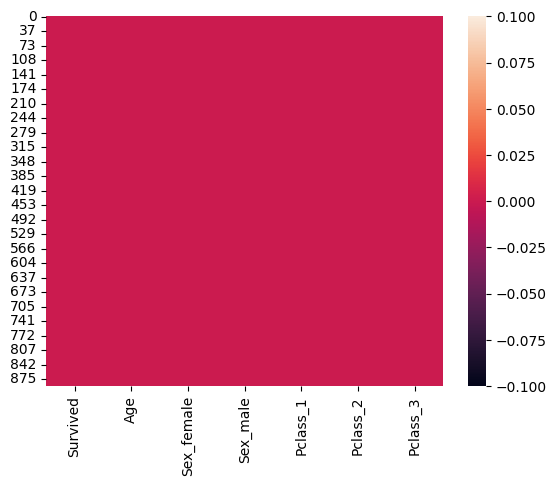

In [167]:
sns.heatmap(df.isnull())

In [168]:
df.shape

(714, 7)

In [169]:
df.isnull().sum()

Survived      0
Age           0
Sex_female    0
Sex_male      0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
x = df.drop(["Survived"], axis=1)
y = df["Survived"]

In [172]:
X.shape


(714, 6)

In [173]:
y.shape

(714,)

In [174]:
df.shape

(714, 7)

In [175]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [176]:
from sklearn.linear_model import LogisticRegression
logisticregression = LogisticRegression()

In [177]:
logisticregression.fit(x_train, y_train)

LogisticRegression()

In [178]:
pred = logisticregression.predict(x_test)
pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1])

In [179]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred )

0.7669491525423728

In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       137
           1       0.74      0.69      0.71        99

    accuracy                           0.77       236
   macro avg       0.76      0.76      0.76       236
weighted avg       0.77      0.77      0.77       236



## What if i change the parameter?

In [181]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 'C':[0.1, 0.5, 1, 5, 10], 'max_iter' : [100, 200, 300, 400, 500]}

In [182]:
classifier_regressor = GridSearchCV(logisticregression, param_grid = parameter, cv=5, scoring='accuracy')

In [183]:
classifier_regressor.fit(x_train, y_train)


/Users/devayushrout/Desktop/ Regression Models/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
375 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/devayushrout/Desktop/ Regression Models/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/devayushrout/Desktop/ Regression Models/myenv/lib/python3.9/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/devayushrout/Desktop/ Regression Mode

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='accuracy')

In [185]:
y_pred = classifier_regressor.predict(x_test)

In [186]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7669491525423728

### done both 